In [1]:
!nvidia-smi

Wed Jul 31 12:24:15 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8              12W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.196

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 29.7/201.2 GB disk)


In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [6]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow --quiet


from roboflow import Roboflow
rf = Roboflow(api_key="yoFw5Tt8xzpRTwfFSvsl")
project = rf.workspace("myworkspace-3iec1").project("restgaurd")
version = project.version(1)
dataset = version.download("yolov8")

mkdir: cannot create directory ‘/content/datasets’: File exists
/content/datasets
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to RestGaurd-1 in yolov8:: 100%|██████████| 2500/2500 [00:00<00:00, 7988.46it/s]


In [8]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=15 imgsz=800 plots=True

/content
New https://pypi.org/project/ultralytics/8.2.70 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/datasets/RestGaurd-1/data.yaml, epochs=15, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=Fal

In [10]:
!ls {HOME}/runs/detect/train2/

args.yaml					    R_curve.png		val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		val_batch0_pred.jpg
confusion_matrix.png				    results.png		val_batch1_labels.jpg
events.out.tfevents.1722428920.21e99b8c99fa.2443.0  train_batch0.jpg	val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	val_batch2_pred.jpg
labels.jpg					    train_batch345.jpg	weights
P_curve.png					    train_batch346.jpg
PR_curve.png					    train_batch347.jpg


/content


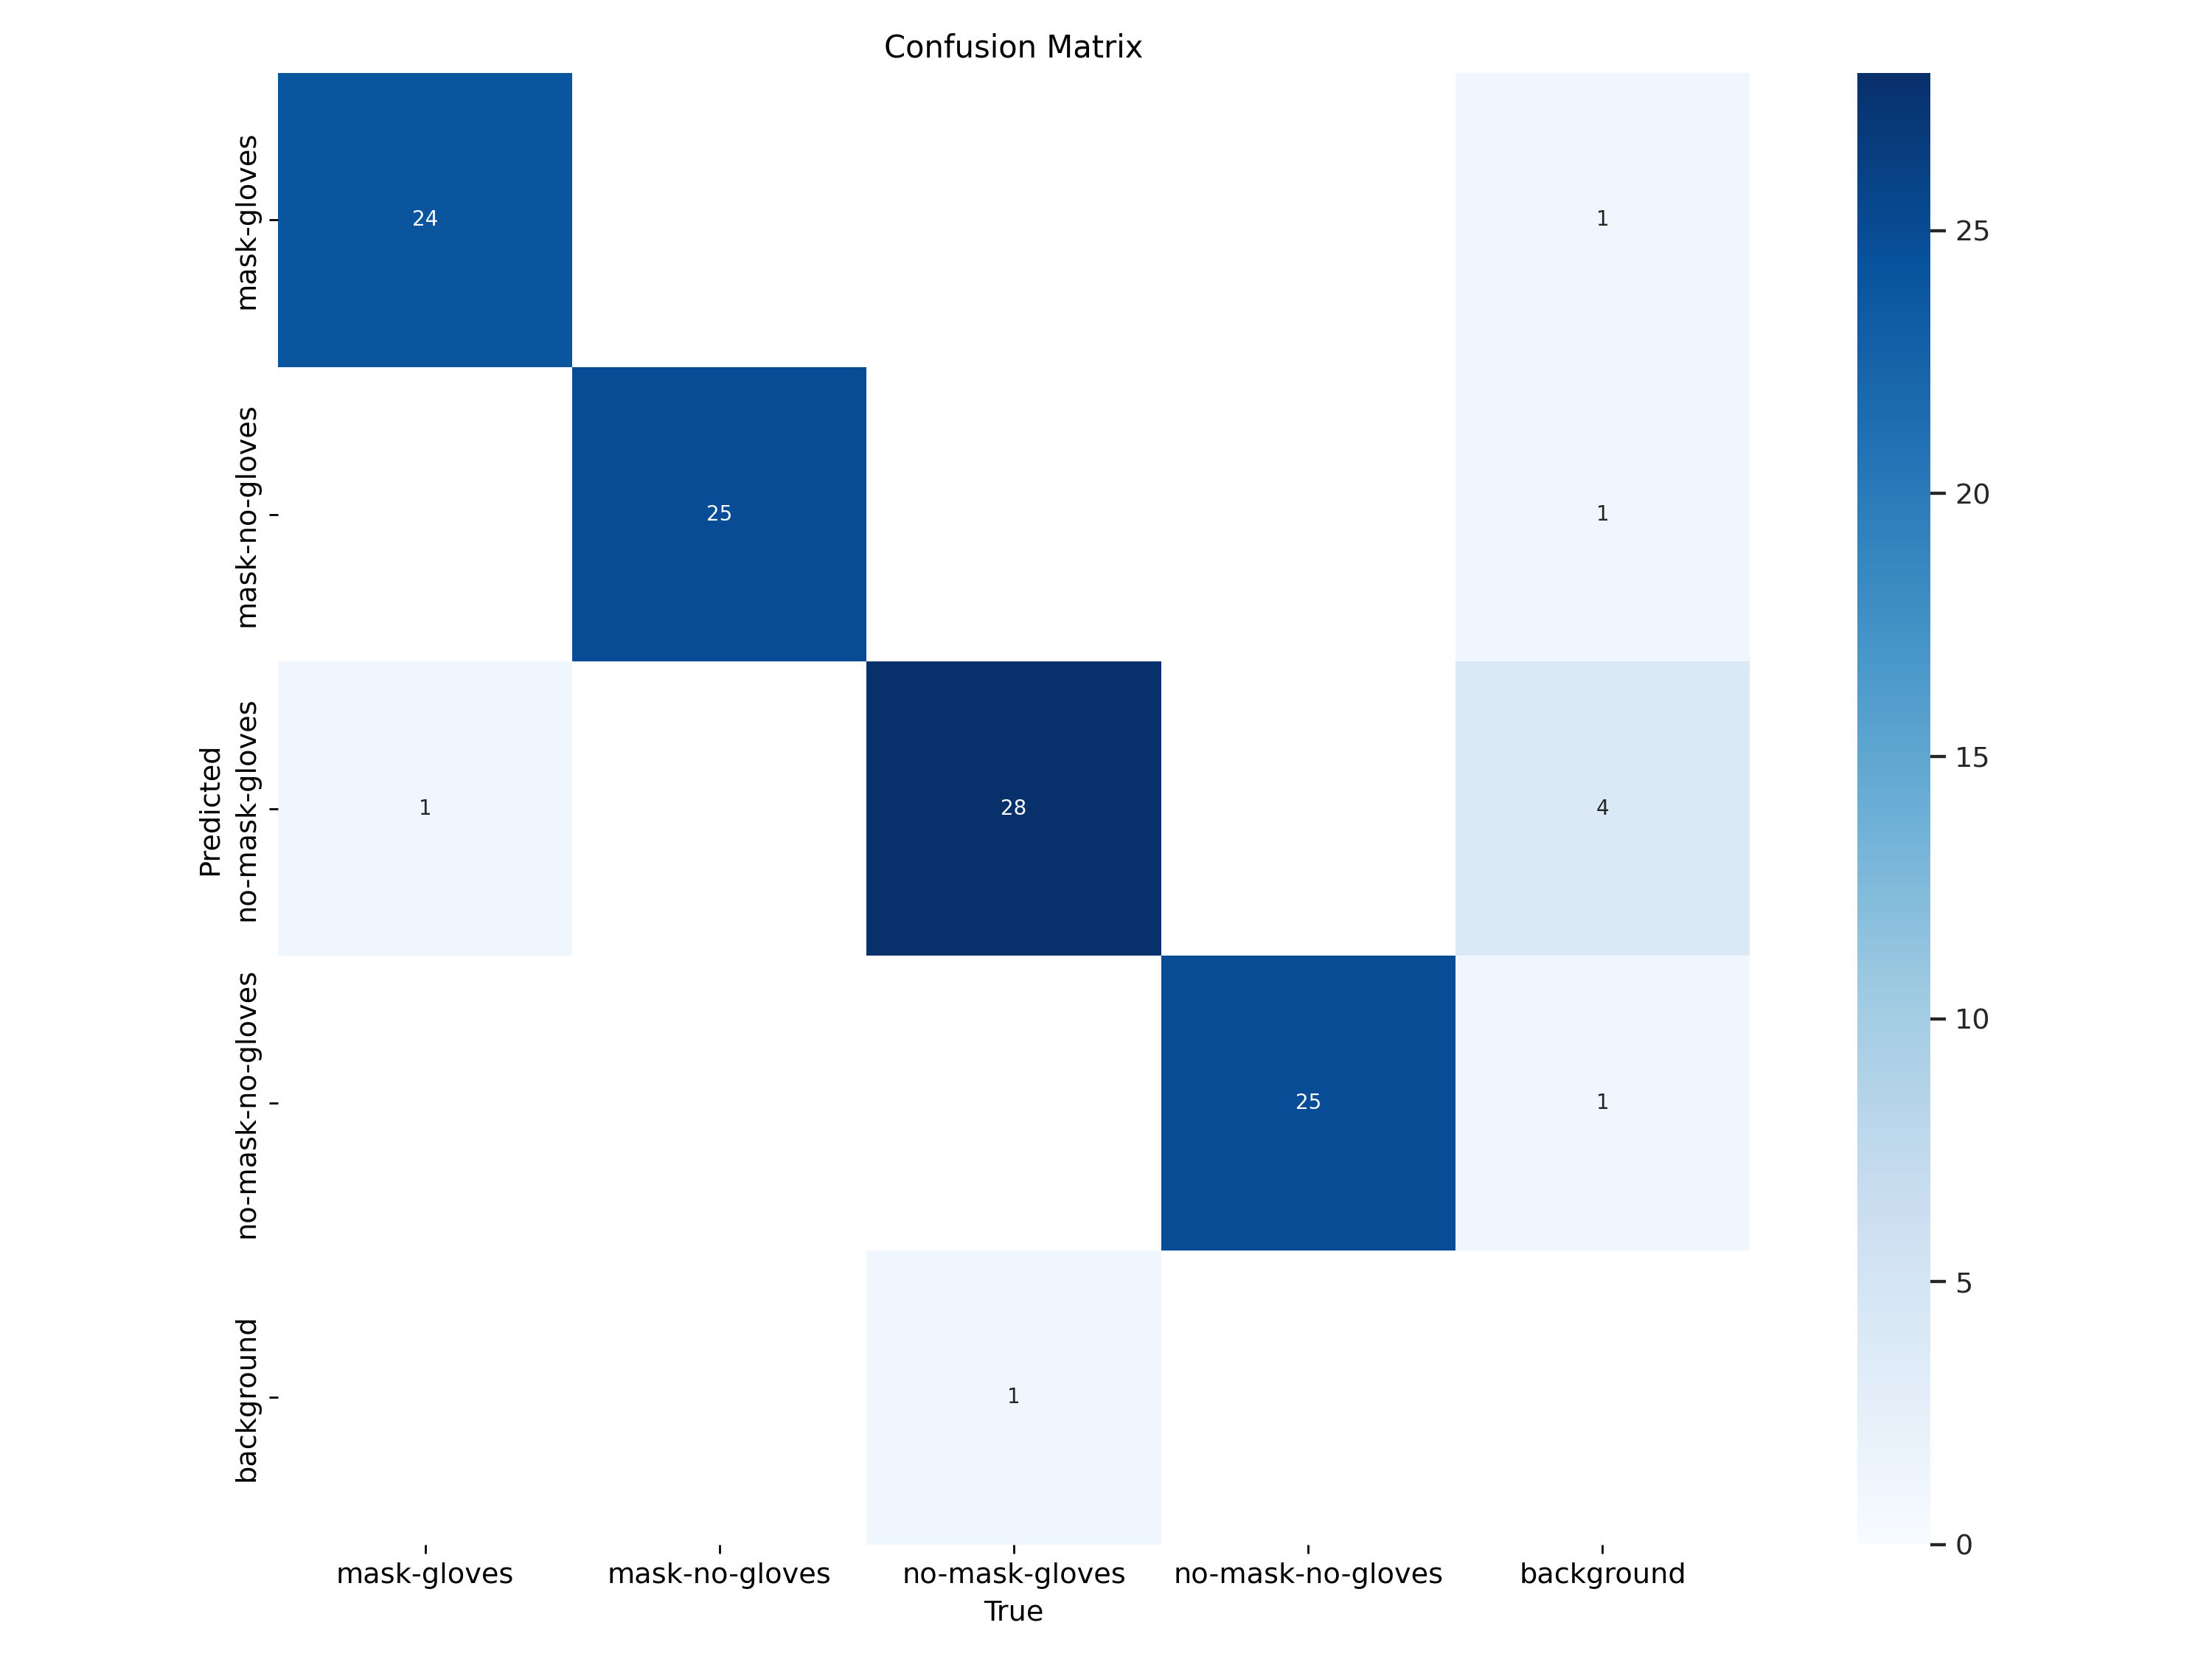

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


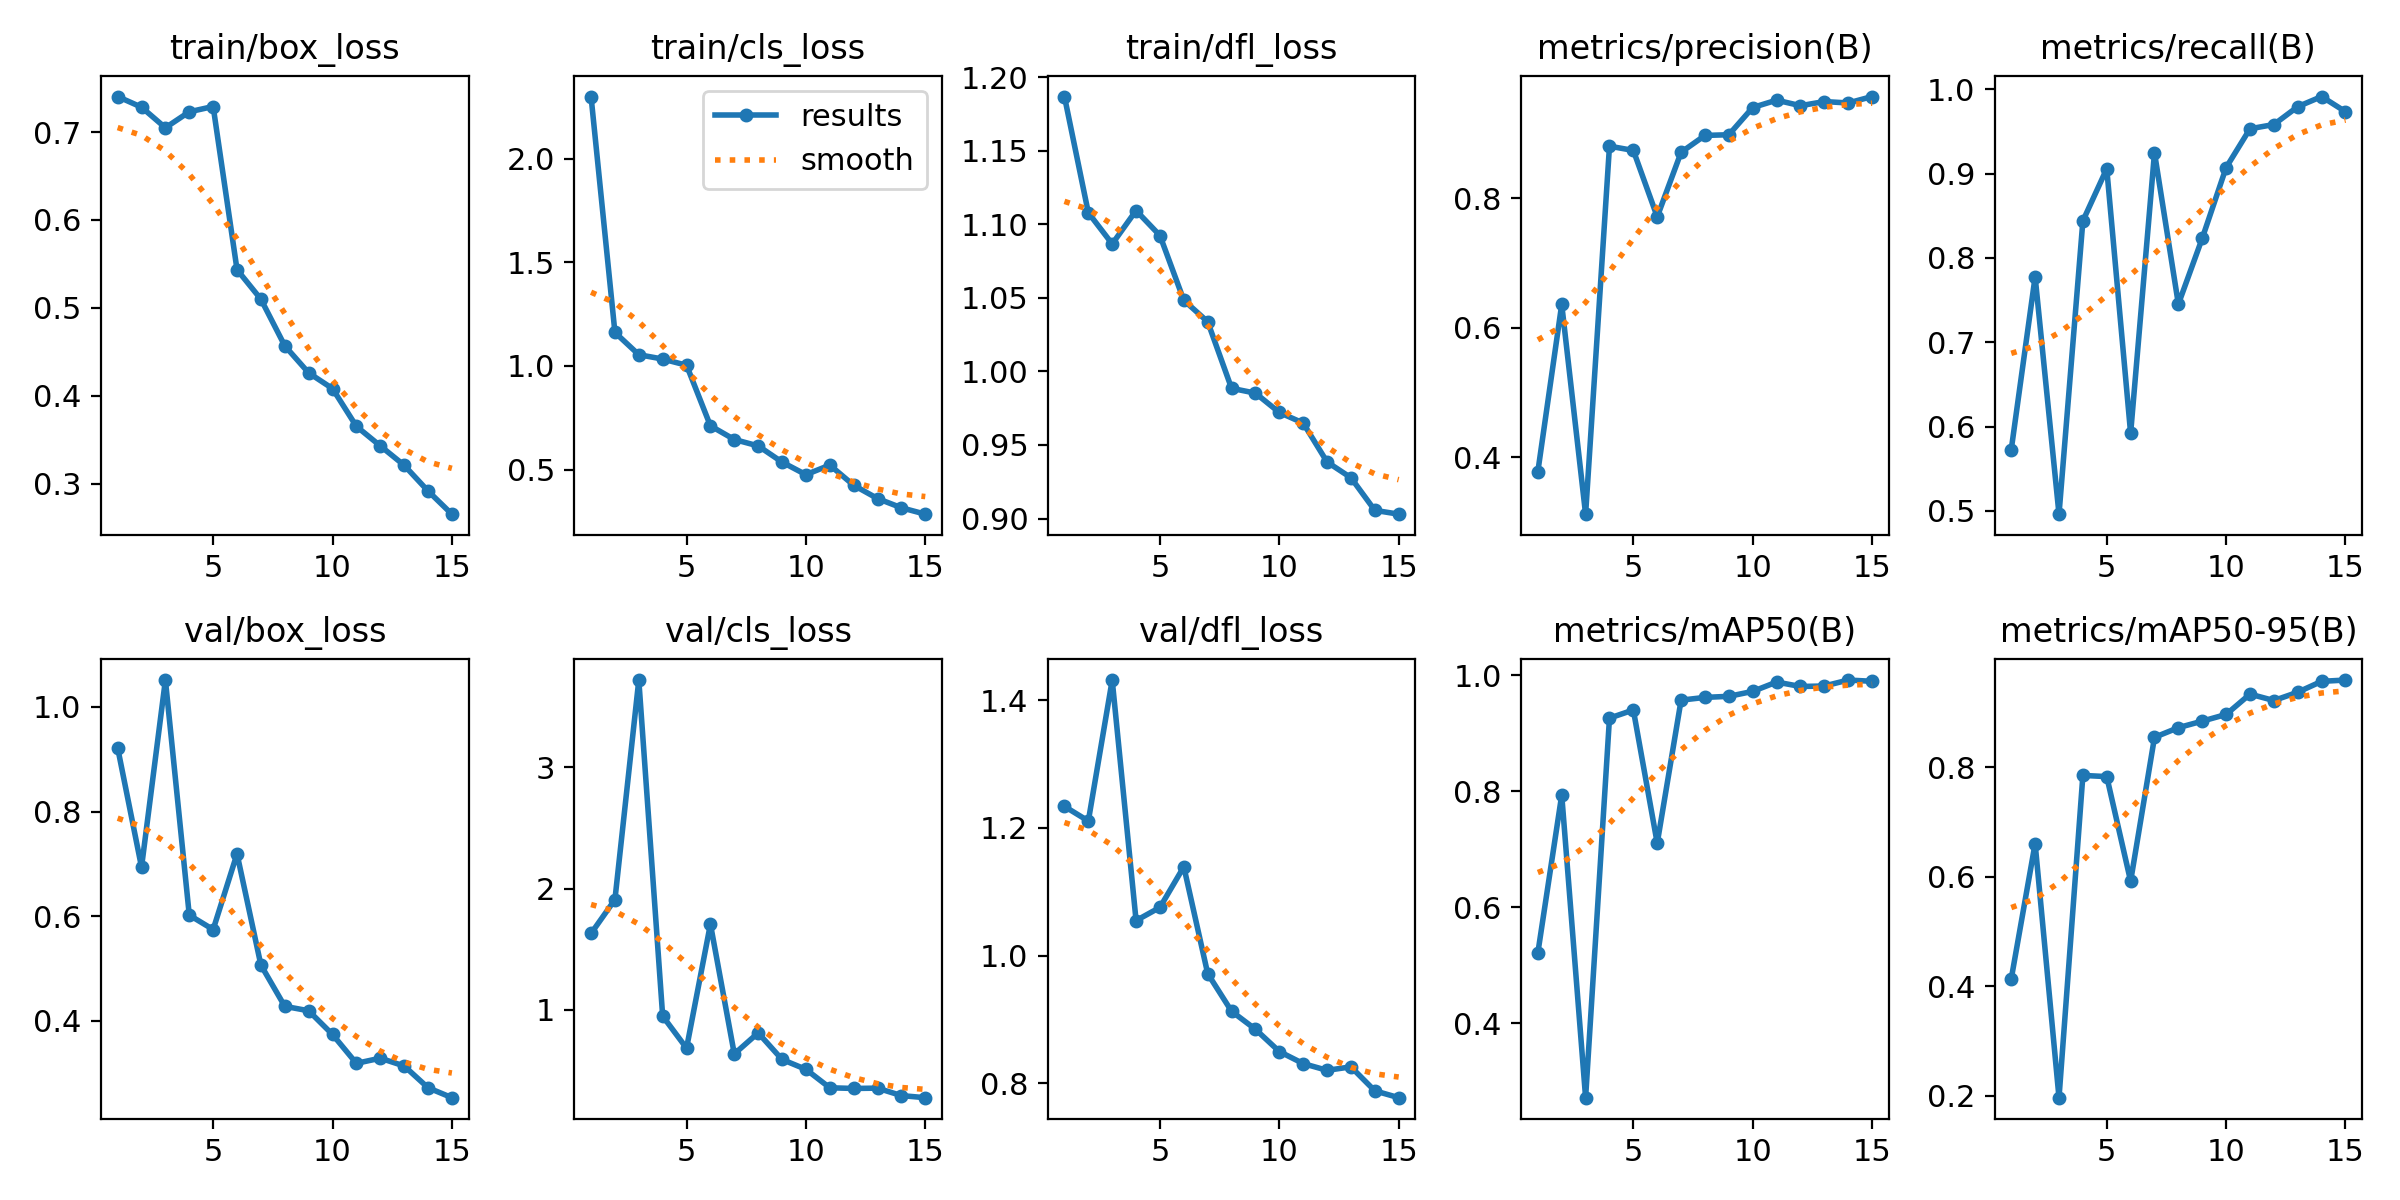

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


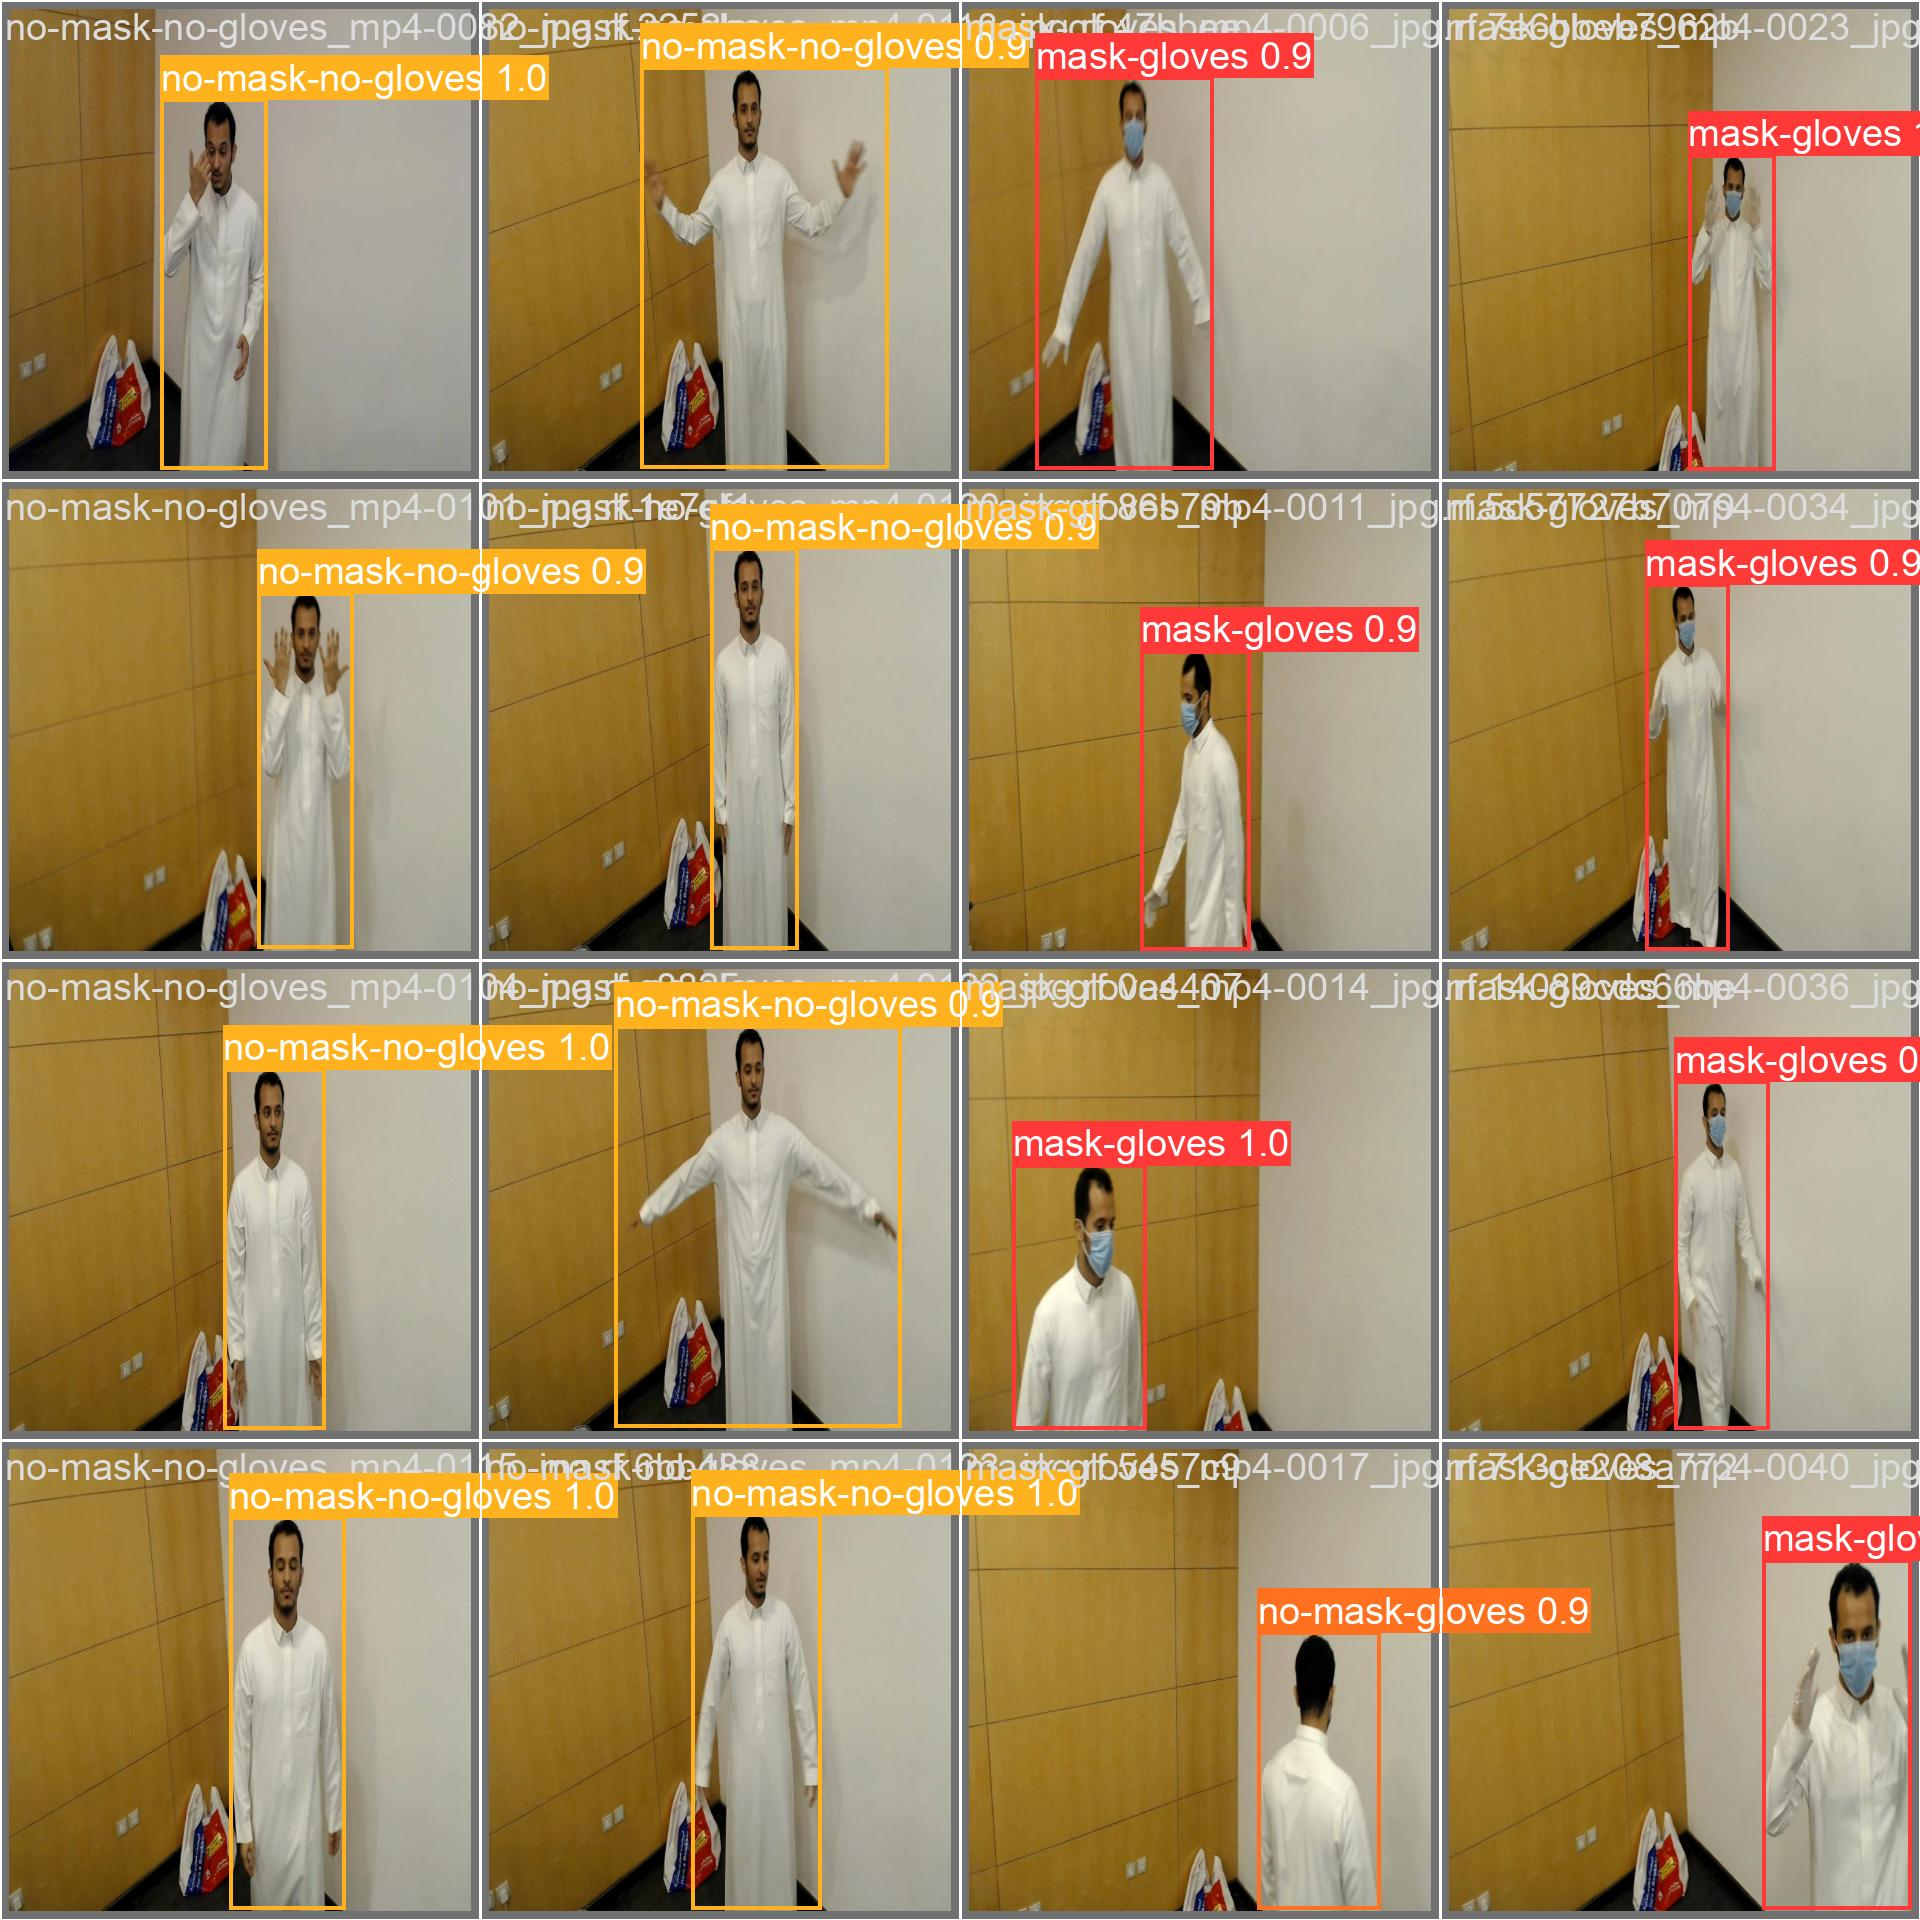

In [13]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [14]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs
val: Scanning /content/datasets/RestGaurd-1/valid/labels.cache... 104 images, 2 backgrounds, 0 corrupt: 100% 104/104 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 7/7 [00:05<00:00,  1.26it/s]
                   all        104        104      0.957      0.973      0.989       0.96
           mask-gloves        104         25      0.959      0.928      0.984      0.969
        mask-no-gloves        104         25      0.995          1      0.995      0.931
        no-mask-gloves        104         29      0.889      0.966      0.983       0.97
     no-mask-no-gloves        104         25      0.986          1      0.995      0.969
Speed: 5.0ms preprocess, 17.6ms inference, 0.1ms loss, 11.6ms postprocess per image
Results saved to runs/detect/val
💡 

## Inference with Custom Model

In [15]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train2/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.196 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11127132 parameters, 0 gradients, 28.4 GFLOPs

WARNING ⚠️ NMS time limit 0.550s exceeded
image 1/51 /content/datasets/RestGaurd-1/test/images/mask-gloves_mp4-0010_jpg.rf.4ee7a94c1508a183d4ec25c03fe52c3f.jpg: 800x800 1 mask-gloves, 26.0ms
image 2/51 /content/datasets/RestGaurd-1/test/images/mask-gloves_mp4-0016_jpg.rf.5ec0bd6fb1021af7b9cdb6b45ca997b3.jpg: 800x800 1 mask-gloves, 22.6ms
image 3/51 /content/datasets/RestGaurd-1/test/images/mask-gloves_mp4-0018_jpg.rf.c43c6b923f583f6eb631566d4991ded1.jpg: 800x800 1 no-mask-gloves, 22.6ms
image 4/51 /content/datasets/RestGaurd-1/test/images/mask-gloves_mp4-0026_jpg.rf.f0ac671b06e9c43930fe0202919ad19f.jpg: 800x800 1 mask-gloves, 22.5ms
image 5/51 /content/datasets/RestGaurd-1/test/images/mask-gloves_mp4-0029_jpg.rf.df6994d36745da4117d19c1faac28483.jpg: 800x800 1 mask-gloves, 22.6ms
image 6/51 /content/datasets/Re

**NOTE:** Let's take a look at few results.

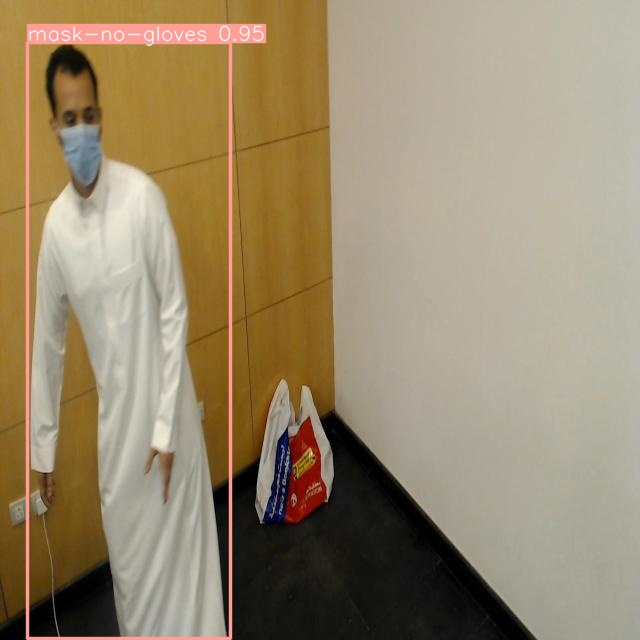

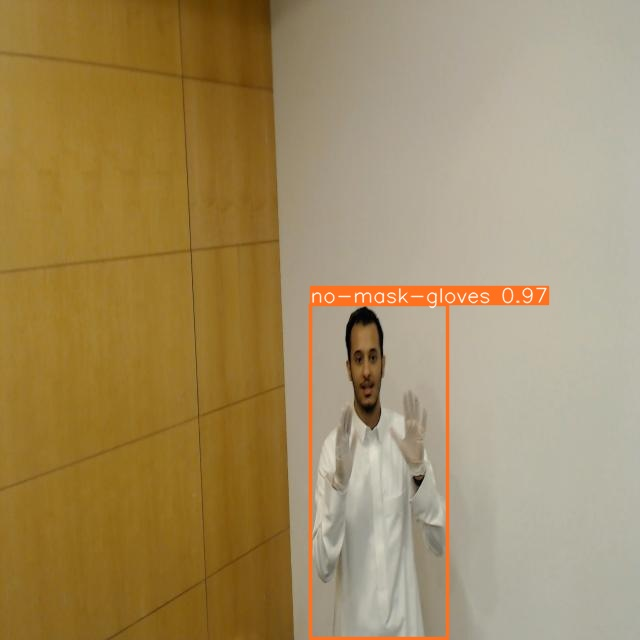

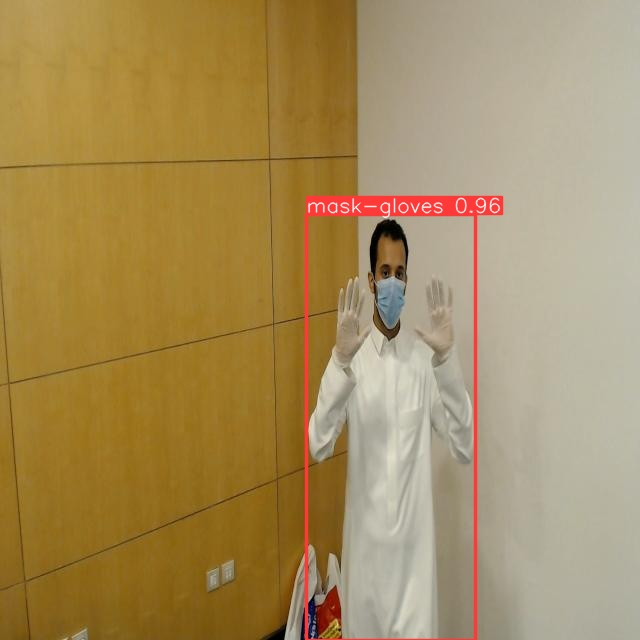

In [16]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")